In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [5]:
Airline = pd.read_csv("C:\\Users\\DELL\\Downloads\\Airlines+Data_new.csv", header=0, index_col=0,parse_dates=True)
Airline

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


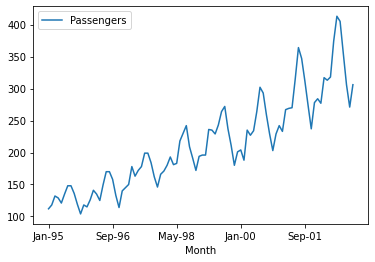

In [6]:
Airline.plot()
pyplot.show()

## Histogram and Density Plots

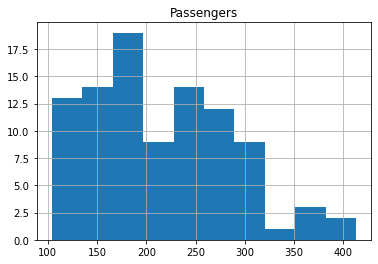

In [7]:
Airline.hist()
pyplot.show()

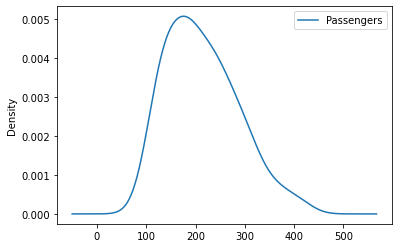

In [8]:
Airline.plot(kind='kde')
pyplot.show()

## Lag plot

In [16]:
from pandas.plotting import lag_plot

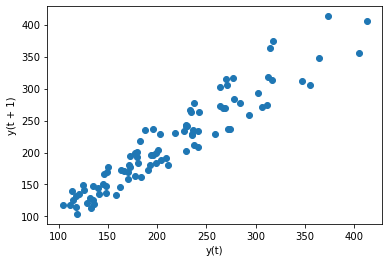

In [17]:
lag_plot(Airline)
pyplot.show()

## # ACF plots and PACF plots

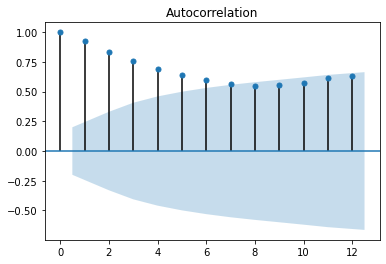

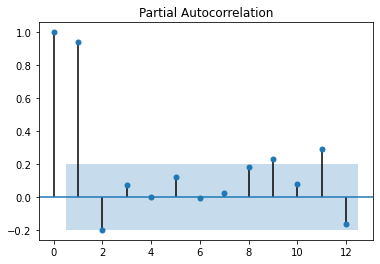

In [22]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Airline.Passengers,lags=12)
tsa_plots.plot_pacf(Airline.Passengers,lags=12)
pyplot.show()


## Time series decomposition plot

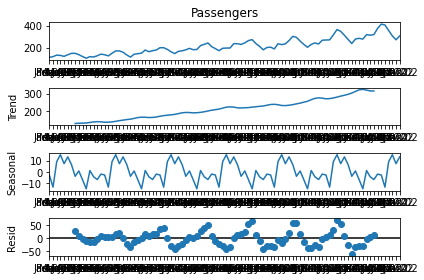

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(Airline.Passengers,period=15)
decompose_ts_add.plot()
pyplot.show()

In [26]:
Airlines= pd.read_csv("C:\\Users\\DELL\\Downloads\\Airlines+Data_new.csv")
Airlines

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [27]:
months =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

In [29]:
p = Airlines['Month'][0]

In [30]:
Airlines["months"]=0

In [32]:
for i in range(96):
    p = Airlines["Month"][i]
    Airlines['months'][i]= p[0:3]
    

<ipython-input-32-b4fb82f418c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airlines['months'][i]= p[0:3]
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
Airlines

,Month,Passengers,months
0,Jan-95,112,Jan
1,Feb-95,118,Feb
2,Mar-95,132,Mar
3,Apr-95,129,Apr
4,May-95,121,May
...,...,...,...
91,Aug-02,405,Aug
92,Sep-02,355,Sep
93,Oct-02,306,Oct
94,Nov-02,271,Nov


In [41]:
month_dummies = pd.DataFrame(pd.get_dummies(Airlines['months']))
Airline1 = pd.concat([Airlines,month_dummies],axis = 1)
Airline1["t"] = np.arange(1,97)
Airline1["t_squared"] = Airline1["t"]*Airline1["t"]
Airline1["log_Passengers"] = np.log(Airline1["Passengers"])
Airline1

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [43]:
Train = Airline1.head(80)
Test = Airline1.tail(16)
Test=Test.set_index(np.arange(1,17))

In [47]:
Train.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [48]:
Test.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
1,Sep-01,312,Sep,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003
2,Oct-01,274,Oct,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128
3,Nov-01,237,Nov,0,0,0,0,0,0,0,0,0,1,0,0,83,6889,5.468060
4,Dec-01,278,Dec,0,0,1,0,0,0,0,0,0,0,0,0,84,7056,5.627621
5,Jan-02,284,Jan,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974


In [51]:
def Cal_RMSE(actual,pred):
    RMSE=np.sqrt(np.mean((np.array(actual)-np.array(pred))**2))
    return RMSE

## Linear Model

In [53]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
actual=np.array(Test['Passengers'])
rmse_linear = Cal_RMSE(actual,pred_linear)
rmse_linear


47.542624067726784

## Exponential Model

In [57]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
pred=np.exp(pred_Exp)
rmse_Exp = Cal_RMSE(actual,pred)
rmse_Exp

43.79373939334305

## Quadratic Model

In [58]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = Cal_RMSE(actual,pred_Quad)
rmse_Quad

43.654403695842056

## Additive Seasonality

In [59]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = Cal_RMSE(actual,pred_add_sea)
rmse_add_sea

129.26647641443307

## Additive Seasonality Quadratic 

In [60]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = Cal_RMSE(actual,pred_add_sea_quad)
rmse_add_sea_quad 

23.910983570104857

## Multiplicative Seasonality

In [61]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
pred=np.exp(pred_Mult_sea)
rmse_Mult_sea = Cal_RMSE(actual,pred)
rmse_Mult_sea

135.32648414621084

## Multiplicative Additive Seasonality

In [62]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
pred=np.exp(pred_Mult_add_sea)
rmse_Mult_add_sea = Cal_RMSE(actual,pred)
rmse_Mult_add_sea

9.46900023030376

## Model Testing

In [63]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


### We can see that least RMSE (i.e 9.469) is observed for Multiplicative Additive Seasonality thus consider this model.

## Predict for new values

In [64]:
predict_data = pd.read_csv("C:\\Users\\DELL\\Downloads\\Predict_new.csv")
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [65]:
Model= smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()

In [66]:
predict = pd.Series(Model.predict(predict_data))
predict

0     6.557609
1     6.547890
2     6.666252
3     6.773515
4     6.773890
5     6.664570
6     6.537489
7     6.407977
8     6.543202
9     6.567192
10    6.582786
11    6.727150
dtype: float64

In [67]:
predict_data["forecasted_Passengers"] = pd.Series(predict)

In [68]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Passengers
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,6.557609
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,6.547890
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,6.666252
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,6.773515
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,6.773890
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,6.664570
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,6.537489
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,6.407977
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,6.543202
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,6.567192


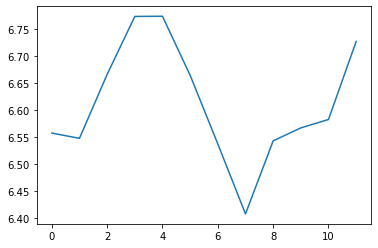

In [69]:
predict_data["forecasted_Passengers"].plot()